In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.datasets import load_digits
from sklearn.linear_model import SGDClassifier

D:\Programing\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
digits = load_digits()
X, y = digits.data, digits.target
model = SGDClassifier(loss='log',
                      shuffle=True,
                      n_jobs=-1,
                      penalty='l2',
                      alpha=0.0001,
                      random_state=3)

## 学习曲线-不同训练样本大小

In [8]:
train_size, train_scores, test_scores = learning_curve(
    model,
    X,
    y,
    train_sizes=np.linspace(0.1, 1.0, 10),  # 训练集切分比例
    cv=10,
    scoring='accuracy',
    exploit_incremental_learning=False,
    n_jobs=-1)

In [9]:
train_size

array([ 161,  323,  485,  646,  808,  970, 1131, 1293, 1455, 1617])

In [10]:
train_scores

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.99690402, 0.99380805, 0.99071207, 0.99071207, 0.99071207,
        0.99071207, 0.99071207, 0.99071207, 0.99071207, 0.99071207],
       [0.99587629, 0.99175258, 0.99381443, 0.99793814, 0.99793814,
        0.99793814, 0.99793814, 0.99793814, 0.99793814, 0.99793814],
       [0.99071207, 0.99071207, 0.99690402, 0.97368421, 0.99845201,
        0.99845201, 0.99845201, 0.99845201, 0.99845201, 0.99845201],
       [0.98886139, 0.98391089, 0.98267327, 0.96287129, 0.98267327,
        0.98638614, 0.98638614, 0.98638614, 0.98638614, 0.98638614],
       [0.99484536, 0.98350515, 0.98969072, 0.9814433 , 0.98556701,
        0.98556701, 0.99690722, 0.99690722, 0.99690722, 0.99690722],
       [0.97082228, 0.99115827, 0.98938992, 0.98054819, 0.9867374 ,
        0.98408488, 0.98143236, 0.98850575, 0.98850575, 0.98850575],
       [0.97525135, 0.99149265, 0.9883990

In [22]:
test_scores.shape

(10, 10)

In [12]:
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores, axis=1), 0, 1)  # 范围取值
lower_train = np.clip(mean_train - np.std(train_scores, axis=1), 0, 1)

In [13]:
mean_train

array([1.        , 0.99164087, 0.99670103, 0.99427245, 0.98329208,
       0.99082474, 0.98496905, 0.98306265, 0.97381443, 0.97606679])

In [14]:
mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores, axis=1), 0, 1)  # 范围取值
lower_test = np.clip(mean_test - np.std(test_scores, axis=1), 0, 1)

In [15]:
mean_test

array([0.8102576 , 0.84361577, 0.89760397, 0.90874302, 0.90703911,
       0.91369646, 0.91482309, 0.92261639, 0.91930478, 0.91873371])

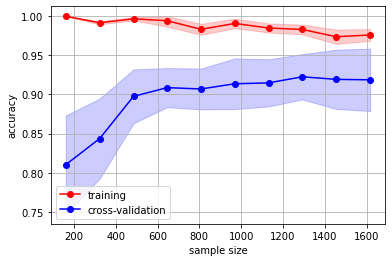

In [21]:
plt.plot(train_size, mean_train, 'ro-', label='training')
plt.fill_between(train_size, upper_train, lower_train, alpha=0.2, color='r')
plt.plot(train_size, mean_test, 'bo-', label='cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.2, color='b')
plt.grid()
plt.xlabel('sample size')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 验证曲线-不同模型参数

In [23]:
testing_range = np.logspace(-5, 2, 8)
testing_range

array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [24]:
train_scores, test_scores = validation_curve(model,
                                             X,
                                             y,
                                             param_name='alpha',
                                             param_range=testing_range,
                                             cv=10,
                                             scoring='accuracy',
                                             n_jobs=-1)

In [25]:
mean_train = np.mean(train_scores, axis=1)
upper_train = np.clip(mean_train + np.std(train_scores, axis=1), 0, 1)  # 范围取值
lower_train = np.clip(mean_train - np.std(train_scores, axis=1), 0, 1)

mean_test = np.mean(test_scores, axis=1)
upper_test = np.clip(mean_test + np.std(test_scores, axis=1), 0, 1)  # 范围取值
lower_test = np.clip(mean_test - np.std(test_scores, axis=1), 0, 1)

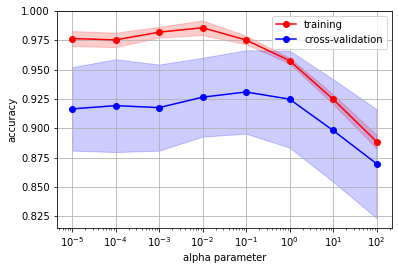

In [27]:
plt.semilogx(testing_range, mean_train, 'ro-', label='training')
plt.fill_between(testing_range, upper_train, lower_train, alpha=0.2, color='r')
plt.semilogx(testing_range, mean_test, 'bo-', label='cross-validation')
plt.fill_between(testing_range, upper_test, lower_test, alpha=0.2, color='b')
plt.grid()
plt.xlabel('alpha parameter')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## 特征重要性

In [9]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor

boston=load_boston()
X, y=boston.data, boston.target
features_names=np.array([' '.join([str(index), name]) for name, index
                         in zip(boston.feature_names, range(len(boston.feature_names)))])
rfr=RandomForestRegressor(n_estimators=100, random_state=101)
rfr.fit(X, y)

RandomForestRegressor(random_state=101)

In [10]:
importance=np.mean([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
std=np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices=np.argsort(importance)  # 值按小到大排序，取其索引
range_=range(len(importance))

In [11]:
indices

array([ 3,  1,  8,  2, 11,  6,  9, 10,  4,  0,  7, 12,  5], dtype=int64)

In [12]:
importance

array([0.03884445, 0.00114267, 0.00563308, 0.00064189, 0.02294134,
       0.40491908, 0.01325143, 0.0630917 , 0.00338748, 0.01332045,
       0.01829177, 0.01194081, 0.40259385])

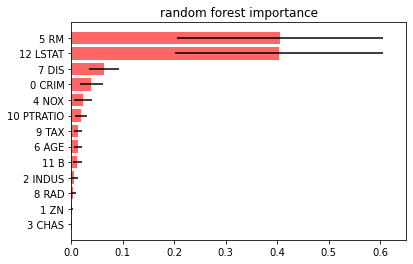

In [13]:
plt.figure()
plt.title('random forest importance')
plt.barh(range_, importance[indices], color='r', xerr=std[indices], alpha=0.6, align='center')
plt.yticks(range_, features_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()